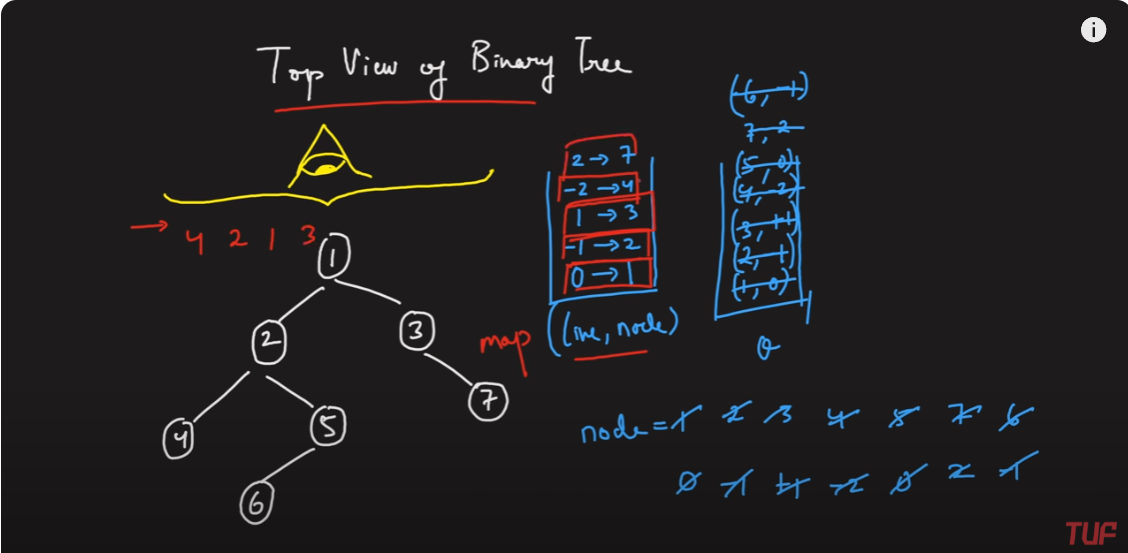
### Top View of Binary Tree gfg


In [ ]:
class Solution:
    #Function to return a list of nodes visible from the top view 
    #from left to right in Binary Tree.
    def topView(self,root):
        # code here
        
        _stack = [[root,0]] # [node,col]
        _map = dict()
        max_col = 0
        min_col = 0
        
        while _stack:
            n = len(_stack)
            for i in range(n):
                k,col = _stack.pop(0)
                
                if k.left:
                    _stack.append([k.left,col-1])
                if k.right:
                    _stack.append([k.right,col+1])
                max_col = max(max_col,col)
                min_col = min(min_col,col)
                
                if not _map.get(col,False):
                    _map[col] = k.data
        
        output = []       
        # print(_map)
        for i in range(min_col,max_col+1):
            if _map.get(i,float("inf")) != float("inf"):
                output.append(_map[i])
              
        return output  

### Bottom View of Binary Tree gfg
just while map updation in top view once we fill the map we won;t change. but here we will constantly modify with new.

because in level order traversal we need column element which is in max depth   

In [ ]:
class Solution:
    def bottomView(self, root):
        # code here
        # code here
        
        _stack = [[root,0]] # [node,col]
        _map = dict()
        max_col = 0
        min_col = 0
        
        while _stack:
            n = len(_stack)
            for i in range(n):
                k,col = _stack.pop(0)
                
                if k.left:
                    _stack.append([k.left,col-1])
                if k.right:
                    _stack.append([k.right,col+1])
                max_col = max(max_col,col)
                min_col = min(min_col,col)
                _map[col] = k.data
        
        output = []       
        # print(_map)
        for i in range(min_col,max_col+1):
            if _map.get(i,float("inf")) != float("inf"):
                output.append(_map[i])
              
        return output  


### 199. Binary Tree Right Side View 
do level order traversal. the while you pop definitely you pop right most element last that is catch!

In [ ]:
class Solution(object):
    def rightSideView(self, root):
        """
        :type root: Optional[TreeNode]
        :rtype: List[int]
        """
        # do level order traversal and while poping pop all element in stack except 1. that will right most one
        output = []
        if not root:
            return output
        stack = [root]
        while stack:
            n = len(stack)
            for _ in range(n-1):
                k = stack.pop(0)
                if k.left :
                    stack.append(k.left)
                if k.right:
                    stack.append(k.right)
            
            k = stack.pop(0)
            output.append(k.val)
            if k.left :
                stack.append(k.left)
            if k.right:
                stack.append(k.right)
            
        return output

### 101. Symmetric Tree
divide into sub trees and check are they mirror

isequal(root1.left,root2.right) and isequal(root1.right,root2.left):

In [ ]:
class Solution(object):
    def isSymmetric(self, root):
        """
        :type root: Optional[TreeNode]
        :rtype: bool
        """
        if not root.left and not root.right:
            return True
        
       # we get 2 sub tree and to check whether 2 trees are equal or not

        root1 = root.left
        root2 = root.right
        def isequal(root1,root2):
            if not root1 and not root2 :
                return True
            if not root1 or not root2 or root1.val != root2.val:
                return False            
            if  isequal(root1.left,root2.right) and isequal(root1.right,root2.left):
                return True
            return False 
        return isequal(root1,root2)

### 236. Lowest Common Ancestor of a Binary Tree

In [ ]:
class Solution(object):
    def lowestCommonAncestor(self, root, p, q):
        """
        :type root: TreeNode
        :type p: TreeNode
        :type q: TreeNode
        :rtype: TreeNode
        """
        
        # approach1 is find two path check common from left to right. We can get most recent common. where they break there before we had 

        # approch 2
        
        def dfs(node, p, q):
            if not node:
                return None
            if node == p or node == q:
                return node

            left = dfs(node.left, p, q)
            right = dfs(node.right, p, q)

            if left and right:
                return node
            return left if left else right

        return dfs(root, p, q)

### 662. Maximum Width of Binary Tree
approach is using complete binary three indexing
<Pre>
                    1
            1*2             1*2+1
        2*2     2*2+1   3*2         3*2+1

width given by level order 1st element and last  number 
    f - l + 1 // gives width

maintain max of that

In [ ]:
class Solution(object):
    def widthOfBinaryTree(self, root):
        """
        :type root: Optional[TreeNode]
        :rtype: int
        """
        stack = [[root,1]]
        output = 0
        while stack:
            n = len(stack)
            output = max(output,stack[-1][1] - stack[0][1]+1)
            for _ in range(n):
                k, ind = stack.pop(0)
                if k.left:
                    stack.append([k.left,ind*2])
                if k.right:
                    stack.append([k.right,(ind*2)+1])
        return output

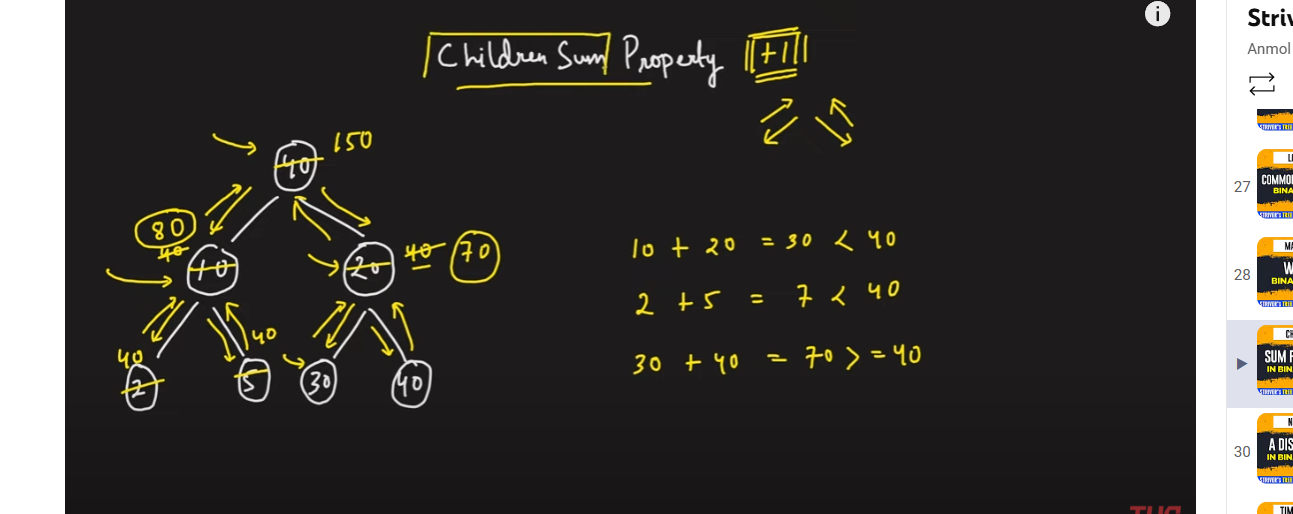
### Children sum property


### 863. All Nodes Distance K in Binary Tree

In [ ]:
from collections import deque

class Solution(object):
    def distanceK(self, root, target, k):
        """
        :type root: TreeNode
        :type target: TreeNode
        :type k: int
        :rtype: List[int]
        """
        # Step 1: Build parent map
        parent_map = {}
        
        def build_parent(node, parent):
            if node:
                parent_map[node] = parent
                build_parent(node.left, node)
                build_parent(node.right, node)

        build_parent(root, None)

        # Step 2: BFS from target
        visited = set()
        queue = deque([target])
        visited.add(target)
        dist = 0

        while queue and dist < k:
            for _ in range(len(queue)):
                node = queue.popleft()
                for neighbor in (node.left, node.right, parent_map.get(node)):
                    if neighbor and neighbor not in visited:
                        visited.add(neighbor)
                        queue.append(neighbor)
            dist += 1

        return [node.val for node in queue]


### 2385. Amount of Time for Binary Tree to Be Infected

You are given the root of a binary tree with unique values, and an integer start. At minute 0, an infection starts from the node with value start.

Each minute, a node becomes infected if:

The node is currently uninfected.
The node is adjacent to an infected node.
Return the number of minutes needed for the entire tree to be infected.

In [ ]:
from collections import deque

class Solution(object):
    def amountOfTime(self, root, start):
        """
        :type root: Optional[TreeNode]
        :type start: int
        :rtype: int
        """

        if not root.left and not root.right:
            return 0

        self.target = None
        parent_map = {}

        def dfs(root,parent):
            if root:
                if root.val == start:
                    self.target = root
                parent_map[root] = parent                
                dfs(root.left,root)
                dfs(root.right,root)                
        dfs(root,None)

        time = 0        
        visited = set()
        queue = deque([self.target])
        visited.add(self.target)
        
        while queue :
            for _ in range(len(queue)):
                node = queue.popleft()
                for neighbor in (node.left, node.right, parent_map.get(node)):
                    if neighbor and neighbor not in visited:
                        visited.add(neighbor)
                        queue.append(neighbor)
            time += 1
        return time-1


### 222. Count Complete Tree Nodes
Given the root of a complete binary tree, return the number of the nodes in the tree.

According to Wikipedia, every level, except possibly the last, is completely filled in a complete binary tree, and all nodes in the last level are as far left as possible. It can have between 1 and 2h nodes inclusive at the last level h.

Design an algorithm that runs in less than O(n) time complexity.

In [ ]:
class Solution(object):
    def countNodes(self, root):
        """
        :type root: Optional[TreeNode]
        :rtype: int
        """
        """
        self.count = 0
        # approach 1
        def rec(root):
            if root:                
                rec(root.left)
                rec(root.right)
                self.count += 1
        rec(root)
        return self.count
        """
        #approach 2. Using concept of complete tree.
        """
        compute the left and rigth height (height is like skewwed. complete left and complete right) . if equal it is a complete tree then number of node are 2^height-1. if not then 1 + leftsubtreenodes + rightSubTreenodes
        """
        def getHeightL(node):
            h = 0
            while(node):
                h+=1
                node = node.left
            return h
        def getHeightR(node):
            h = 0
            while(node):
                h+=1
                node = node.right
            return h

        def countNode(root):
            if not root:
                return 0
            l = getHeightL(root)
            r = getHeightR(root)
            if l == r:
                return (1<<l) - 1
            return 1 + countNode(root.left) + countNode(root.right)
        return countNode(root)

### 105. Construct Binary Tree from Preorder and Inorder Traversal
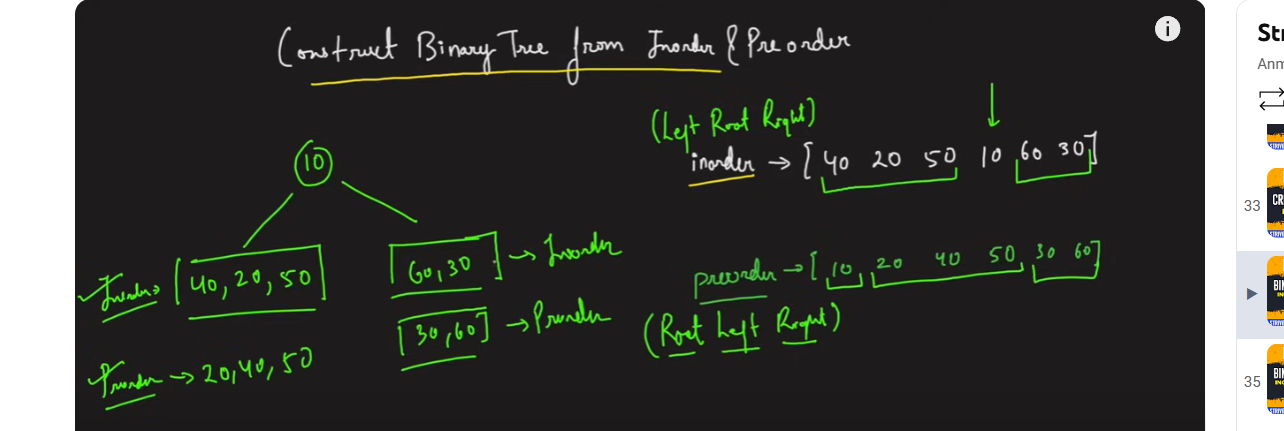


In [1]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution(object):
    def buildTree(self, preorder, inorder):
        """
        :type preorder: List[int]
        :type inorder: List[int]
        :rtype: Optional[TreeNode]
        """
        map = dict()
        # inorder map
        ind = 0
        for i in inorder:
            map[i] = ind
            ind+=1
        
        def buildTree(preorder,ps,pe,inorder,in_s,in_e):
            if (ps>pe or in_s>in_e):
                return None
            root = TreeNode(preorder[ps])
            inroot = map[root.val]
            numsLeft = inroot - in_s
            root.left = buildTree(preorder,ps+1,ps+numsLeft,inorder,in_s,inroot-1)
            root.right = buildTree(preorder,ps+numsLeft+1,pe,inorder,inroot+1,in_e)             
            return root

        return buildTree(preorder,0,len(preorder)-1,inorder,0,len(inorder)-1) 

### 297. Serialize and Deserialize Binary Tree
serialized : tree -> str

deserialized : str -> tree


In [ ]:
class Codec:

    def serialize(self, root):
        """Encodes a tree to a single string.
        
        :type root: TreeNode
        :rtype: str
        """
        if not root:
            return ""
        stack = [root]
        output = []
        while stack:
            n = len(stack)
            for _ in range(n):
                k = stack.pop(0)
                if k == None:
                    output.append("#")
                else:
                    output.append(k.val)
                    stack.append(k.left)
                    stack.append(k.right)
        st = ""
        for i in output:
            st+=str(i)+","
        # print(st.split(","))
        return st


        

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        
        :type data: str
        :rtype: TreeNode
        """
        if data == "":
            return None
        data = data.split(",")
        root = TreeNode(int(data[0]))
        temp = root
        stack = [root]
        ind = 1
        while stack:
            n = len(stack)
            for _ in range(n):
                k = stack.pop(0)                
                k.left =  None if data[ind] == "#" else TreeNode(int(data[ind]))
                ind+=1
                if k.left:
                    stack.append(k.left)
                k.right =  None if data[ind] == "#" else TreeNode(int(data[ind]))
                ind+=1
                if k.right:
                    stack.append(k.right)

        return root

Morris Traversal  very diffcult learn latter

### 114. Flatten Binary Tree to Linked List


In [ ]:
class Solution(object):
    def flatten(self, root):
        """
        :type root: Optional[TreeNode]
        :rtype: None Do not return anything, modify root in-place instead.
        """
        self.prev = None
        def rec(node):
            if not node:
                return
            rec(node.right)
            rec(node.left)
            node.right = self.prev
            node.left = None
            self.prev = node
        rec(root)
        return root

### Ceil in BST in gfg

In [ ]:
class Solution:
    def findCeil(self,root, inp):
        # code here
        temp = root
        val = -1
        while temp:
            if temp.key >= inp:
                val = temp.key
                temp = temp.left
            else:
                temp = temp.right
        return val

### Floor in BST in gfg

In [ ]:
class Solution:
    def floor(self, root, x):
        # Code here
        val = -1
        temp = root
        while temp:
            if temp.data <= x:
                val = temp.data
                temp = temp.right
            else:
                temp = temp.left
        return val

### 701. Insert into a Binary Search Tree

In [ ]:
class Solution(object):
    def insertIntoBST(self, root, val):
        """
        :type root: Optional[TreeNode]
        :type val: int
        :rtype: Optional[TreeNode]
        """
        if not root:
            return TreeNode(val)
        temp = root
        prev = None

        while temp:
            prev = temp
            if val >= temp.val:
                temp = temp.right 
            else:
                temp = temp.left

        if val >= prev.val:
            prev.right = TreeNode(val)
        else:
            prev.left = TreeNode(val)
        return root

### Bst deletion

In [ ]:
class Solution(object):
    def deleteNode(self, root, key):
        """
        :type root: Optional[TreeNode]
        :type key: int
        :rtype: Optional[TreeNode]
        """
        if not root:
            return None

        if key < root.val:
            root.left = self.deleteNode(root.left, key)
        elif key > root.val:
            root.right = self.deleteNode(root.right, key)
        else:
            # Found the node to be deleted
            if not root.left:
                return root.right
            elif not root.right:
                return root.left
            else:
                # Find the inorder successor (smallest in right subtree)
                temp = root.right
                while temp.left:
                    temp = temp.left
                # Replace root's value with successor's value
                root.val = temp.val
                # Delete the successor
                root.right = self.deleteNode(root.right, temp.val)
        return root
